In [1]:
import pandas as pd
import sys
import os
dev = False  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries

Importing plotly failed. Interactive plots will not work.


Imported auto_timeseries version:0.0.28. Call by using:
model = auto_timeseries(score_type='rmse', forecast_period=forecast_period,
                time_interval='Month',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [2]:
file_path="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<AxesSubplot:>

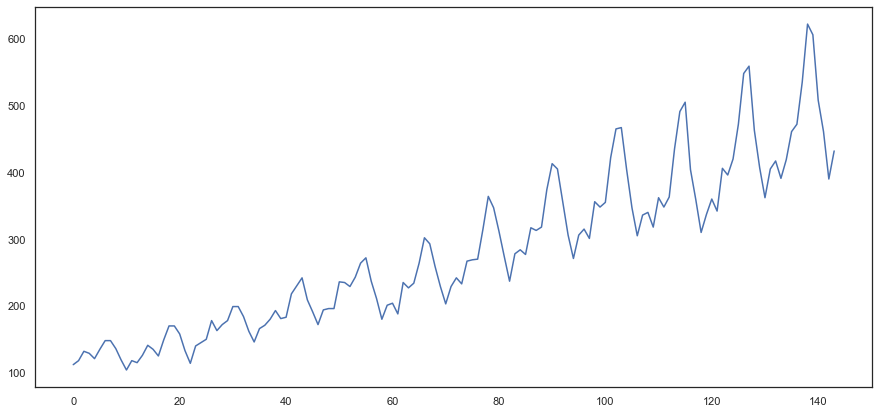

In [8]:
dataset['Passengers'].plot(figsize=(15,7))

# Train Model

In [5]:
ts_column = 'Month'
target = 'Passengers'
sep = ','

In [6]:
FORECAST_PERIOD = 12

In [9]:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 2 regression: c autolag: None
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -1.8108053464636402      |
|           p-value           |      0.3751104882308742      |
|          #Lags Used         |             2.0              |
| Number of Observations Used |            141.0             |
|     Critical Value (1%)     |     -3.4776006742422374      |
|     Critical Value (5%)     |      -2.882265832283648      |
|     Critical Value (10%)    |     -2.5778219289774156      |
+-----------------------------+------------------------------+
 this series is non-stationary. Trying test again after differencing...
After differencing=1, results of Augmented Dickey-Fuller Test:
+-----------------

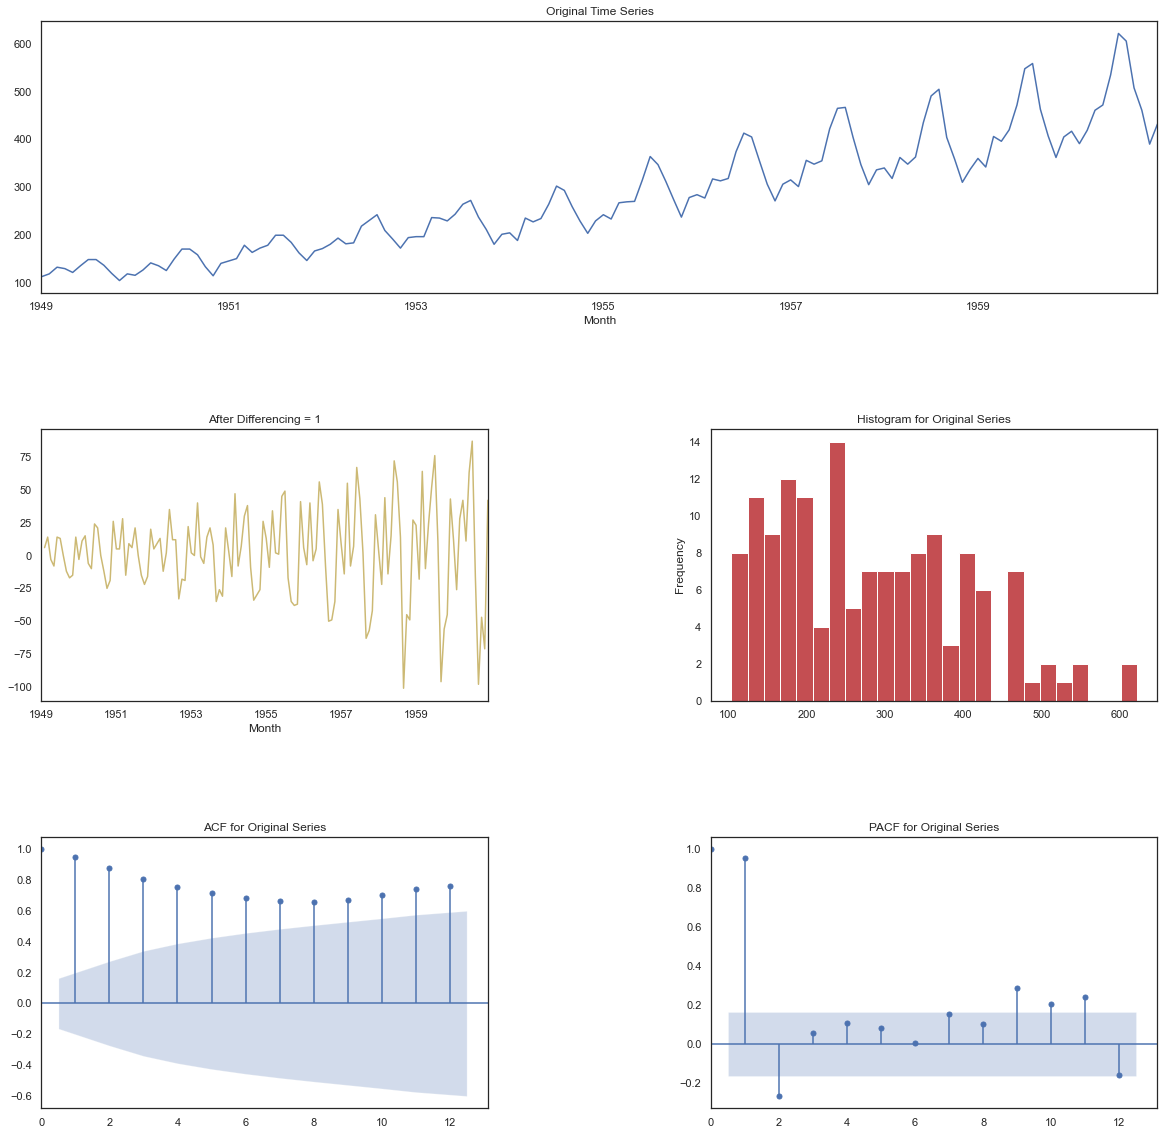

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


    Fit-Predict data (shape=(144, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
  End of Prophet Fit
NumObs: 144
NFOLDS: 3
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3


Fold Number: 1 --> Train Shape: (129, 2) Test Shape: (5, 2)
    RMSE = 21.84
    Std Deviation of Originals = 21.35
    Normalized RMSE = 102%
Cross Validation window: 1 completed


Fold Number: 2 --> Train Shape: (134, 2) Test Shape: (5, 2)
    RMSE = 49.74
    Std Deviation of Originals = 78.99
    Normalized RMSE = 63%
Cross Validation window: 2 completed


Fold Number: 3 --> Train Shape: (139, 2) Test Shape: (5, 2)
    RMSE = 33.94
    Std Deviation of Originals = 82.80
    Normalized RMSE = 41%
Cross Validation window: 3 completed
Average CV RMSE over 3 windows (macro) = 35.17419
Average CV RMSE of all predictions (micro) = 36.98262
  End of Prophet Cross Validation
Time Taken = 6 seconds
Prophet CV DataFrame
Prophet plotting CV Metrics
-----------

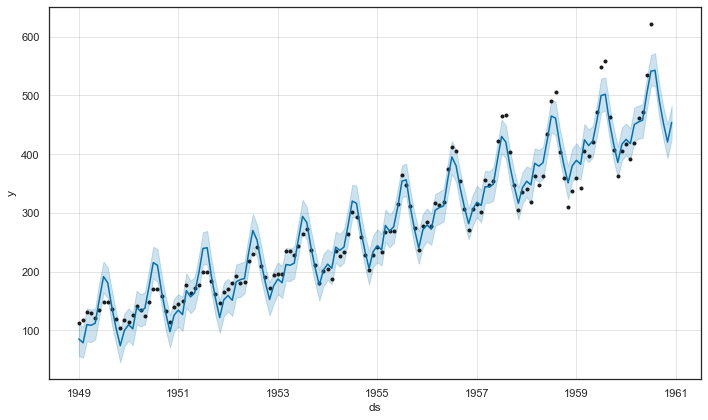

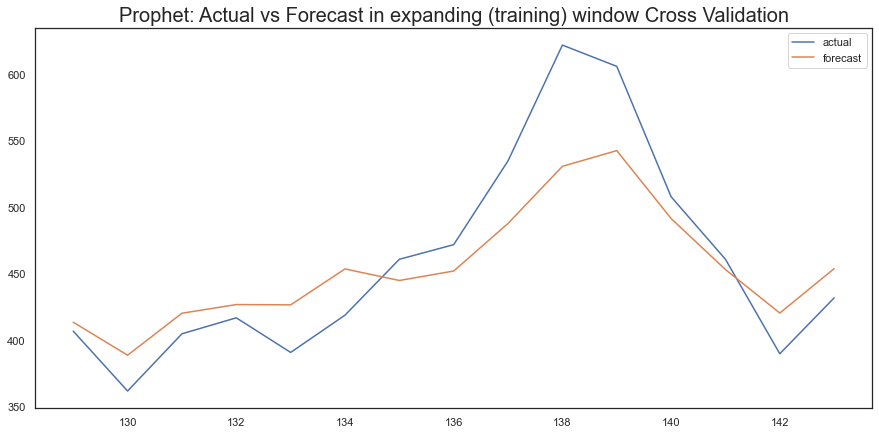

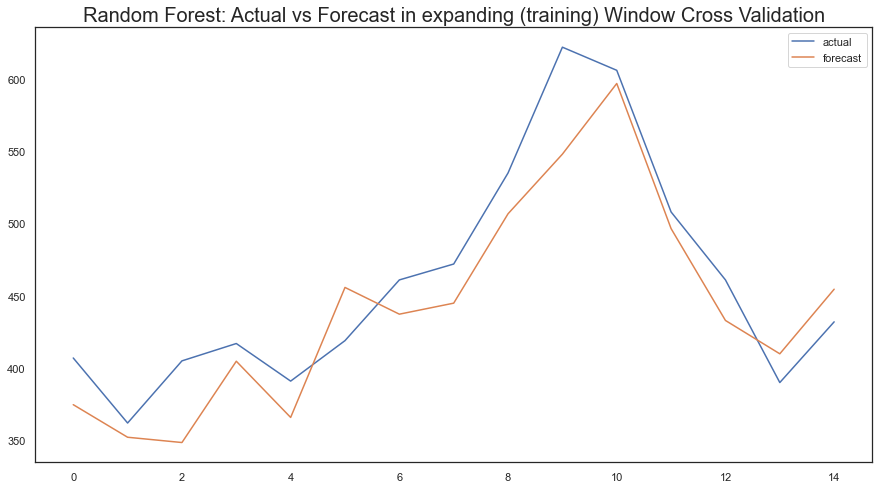

In [10]:
model.fit(
    traindata=dataset,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

# Evaluate Results

In [12]:
model.get_leaderboard()

,name,rmse
3,ML,31.250240
0,Prophet,35.174186
1,auto_SARIMAX,82.352655
2,VAR,inf


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

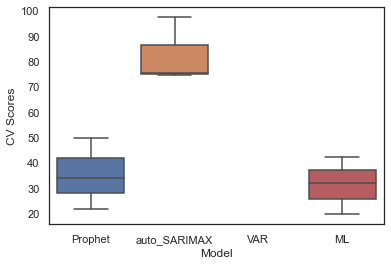

In [13]:
model.plot_cv_scores()

In [15]:
# Make sure all models have the same number of CV folds
model.get_cv_scores()

,Model,CV Scores
0,Prophet,21.843655
1,Prophet,49.742519
2,Prophet,33.936383
3,auto_SARIMAX,97.446035
4,auto_SARIMAX,74.341408
5,auto_SARIMAX,75.270523
6,VAR,inf
7,ML,31.980692
8,ML,42.238596
9,ML,19.531432


In [17]:
results_dict = model.get_ml_dict()

In [18]:
results_dict['Prophet']['forecast']  

129    413.710844
130    388.904520
131    420.463101
132    426.974009
133    426.752615
134    453.744588
135    445.058012
136    452.185617
137    487.960773
138    530.868453
139    542.663685
140    491.629219
141    453.285916
142    420.589056
143    453.993225
Name: yhat, dtype: float64

In [19]:
results_dict['auto_SARIMAX']['forecast'] 

[array([487.93273337, 494.13445307, 502.46719871, 488.09960722,
        485.41407958]),
 array([487.93273337, 494.13445307, 502.46719871, 488.09960722,
        485.41407958]),
 array([487.93273337, 494.13445307, 502.46719871, 488.09960722,
        485.41407958])]

# Forecast Results

In [21]:
# Using Best Model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD
)  
future_predictions

You cannot use integer for predict using ML model. Need to supply Pandas Series or Dataframe.


In [23]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Passengers,yhat,mean_se,mean_ci_lower,mean_ci_upper
1961-01-01,505.105300,29.830836,446.637935,563.572665
1961-02-01,527.171325,46.461034,436.109373,618.233277
1961-03-01,542.751845,50.162975,444.434220,641.069470
1961-04-01,529.614391,50.431163,430.771127,628.457655
1961-05-01,525.894257,50.738106,426.449397,625.339117


In [24]:
# Using specific model
future_predictions = model.predict(
    testdata=FORECAST_PERIOD,
    model='Prophet',
    simple=False

)
future_predictions

Building Forecast dataframe. Forecast Period = 5


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
137,1960-06-01,466.147832,471.581036,529.452839,466.147832,466.147832,34.591309,34.591309,34.591309,34.591309,34.591309,34.591309,0.0,0.0,0.0,500.739142
138,1960-07-01,469.162805,509.299391,569.254656,469.162805,469.162805,70.421815,70.421815,70.421815,70.421815,70.421815,70.421815,0.0,0.0,0.0,539.584620
139,1960-08-01,472.278277,511.586769,568.840266,472.278277,472.278277,68.219918,68.219918,68.219918,68.219918,68.219918,68.219918,0.0,0.0,0.0,540.498195
140,1960-09-01,475.393749,463.432002,522.670128,475.393749,475.393749,16.117800,16.117800,16.117800,16.117800,16.117800,16.117800,0.0,0.0,0.0,491.511548
141,1960-10-01,478.408722,427.599500,486.026251,478.408722,478.408722,-21.777343,-21.777343,-21.777343,-21.777343,-21.777343,-21.777343,0.0,0.0,0.0,456.631378
142,1960-11-01,481.524194,391.746929,452.246518,481.524194,481.524194,-59.658593,-59.658593,-59.658593,-59.658593,-59.658593,-59.658593,0.0,0.0,0.0,421.865601
143,1960-12-01,484.539166,423.284715,481.157972,484.539166,484.539166,-33.463183,-33.463183,-33.463183,-33.463183,-33.463183,-33.463183,0.0,0.0,0.0,451.075984
144,1960-12-31,487.554139,434.330782,490.613095,487.554139,487.554139,-25.369753,-25.369753,-25.369753,-25.369753,-25.369753,-25.369753,0.0,0.0,0.0,462.184386
145,1961-01-31,490.669611,425.395489,482.269462,490.661962,490.680062,-35.797236,-35.797236,-35.797236,-35.797236,-35.797236,-35.797236,0.0,0.0,0.0,454.872376
146,1961-02-28,493.483586,469.979315,526.425882,493.453562,493.523139,4.351153,4.351153,4.351153,4.351153,4.351153,4.351153,0.0,0.0,0.0,497.834739
